In [2]:
from sklearn.datasets import load_iris
import pandas as pd

In [3]:
iris = load_iris()

In [4]:
df = pd.DataFrame(iris.data, columns=[iris.feature_names])

X = df.drop(columns=["sepal length (cm)", "sepal width (cm)"], axis=1)
y = pd.DataFrame(iris.target, columns=["Target"])


C:\Users\kaush\AppData\Local\Temp\ipykernel_20096\2717924827.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df.drop(columns=["sepal length (cm)", "sepal width (cm)"], axis=1)


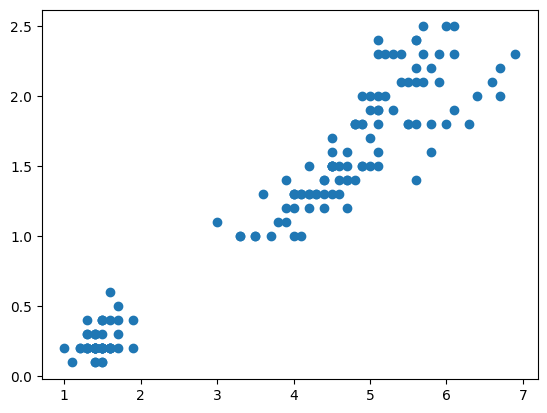

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X["petal length (cm)"], X["petal width (cm)"])
plt.show()

In [6]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, max_iter=100, n_init="auto")

In [7]:
y_pred = model.fit_predict(X)
df["new_target"] = y_pred
df.head(10)

c:\Users\kaush\anaconda3\envs\gpuenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),new_target
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


[]

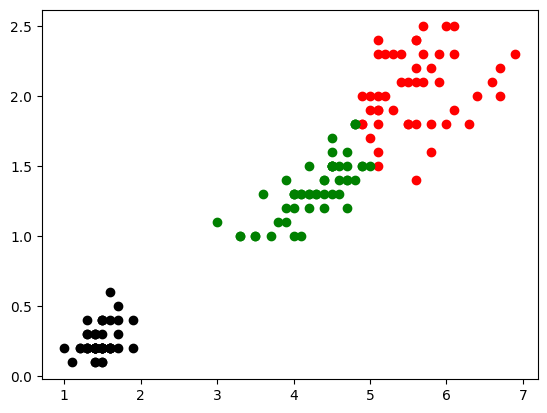

In [8]:
import matplotlib.pyplot as plt
df1 = df[y_pred == 0]
df2 = df[y_pred == 1]
df3 = df[y_pred == 2]
plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], color="red")
plt.scatter(df2["petal length (cm)"], df2["petal width (cm)"], color="black")
plt.scatter(df3["petal length (cm)"], df3["petal width (cm)"], color="green")
plt.plot()

In [9]:
l1 = [len(df1), len(df2), len(df3)]
l2 = [len([x for x in y["Target"] if x == 0]), len([x for x in y["Target"] if x == 1]), len([x for x in y["Target"] if x == 2])]

count = 0
for i in range(len(l2)):
    count += abs(l1[i] - l2[i])

print("Inaccuracy: ", (count / sum(l2)) * 100, "%")

Inaccuracy:  2.666666666666667 %


In [10]:
k_val = range(1, 10)
sse = []
for k in k_val:
    km = KMeans(n_clusters=k, n_init="auto")
    km.fit(X)
    sse.append(km.inertia_)

c:\Users\kaush\anaconda3\envs\gpuenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kaush\anaconda3\envs\gpuenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kaush\anaconda3\envs\gpuenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kaush\anaconda3\envs\gpuenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

In [11]:
sse

[550.8953333333333,
 86.39021984551395,
 31.412885668276978,
 19.483000899685113,
 16.469232449329848,
 11.47073776223776,
 9.281343349632824,
 7.741403295376122,
 7.132891649413388]

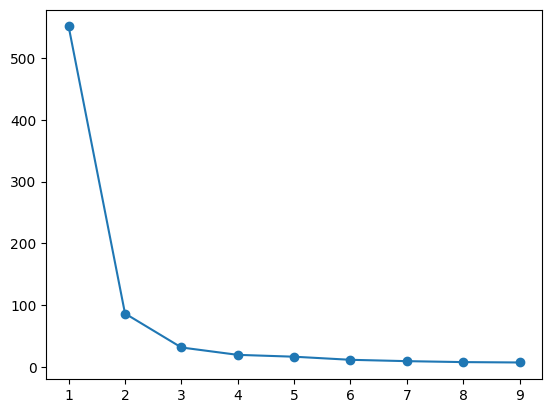

In [12]:
plt.plot(k_val, sse, marker="o")